# 0. Simulate dataset (*)

Simulate datasets according to these rules:

- set random seed to 42
- (1000,2) samples from $X \sim U(0,1)$ , i.e. 1000 rows, 2 columns.
- 1000 samples from $ϵ \sim N(0,1)$
- $ y = 3x_1 + 5x_2 + 3 + \epsilon $

Finally add a column of ones for the intercept to 
X

In [1]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)

X = np.random.uniform(0,1,(1000,2))
e = np.random.normal(0,1,(1000,1))

X1 = np.asarray([X[i][0] for i in range(len(X))]).reshape(1000,1)
X2 = np.asarray([X[i][1] for i in range(len(X))]).reshape(1000,1)

y = 3*X1 + 5*X2 + 3 + e

X = np.c_[np.ones(X.shape[0]), X]

X[:5]

array([[1.        , 0.37454012, 0.95071431],
       [1.        , 0.73199394, 0.59865848],
       [1.        , 0.15601864, 0.15599452],
       [1.        , 0.05808361, 0.86617615],
       [1.        , 0.60111501, 0.70807258]])

# 1. Use gradient descent to calculate $\overrightarrow{\theta} = (\theta _1,\theta _2,\theta _3)^{T}$

a) Use $\eta = 0.1$ and calculate $\overrightarrow{\theta}$ for each fifth epoch from 1 to 500. So the procedure is as follows:
- calculate $\overrightarrow{\theta}$ for epochs = 1
- calculate $\overrightarrow{\theta}$ for epochs = 6
- ...
- calculate $\overrightarrow{\theta}$ for epochs = 496

Plot these $\overrightarrow{\theta}$ values against epochs.


In [2]:
def gradient_descent(X,y,learning_rate=.1, epochs=100):
    m = len(X)

    theta = np.random.randn(X.shape[1],1) 

    for _ in range(epochs):
        gradient = 2/m* X.T @ (X @ theta - y)

        theta -= learning_rate*gradient

    return theta

In [3]:
# train test split 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((670, 3), (330, 3), (670, 1), (330, 1))

In [4]:
import pandas as pd

epoch_list = []
theta_1list = []
theta_2list = []
theta_3list = []


for epoch in range(1,500,5):
    theta_1,theta_2,theta_3 = gradient_descent(X_train,y_train,learning_rate=.1,epochs=epoch).flatten()
    epoch_list.append(epoch)
    theta_1list.append(theta_1)
    theta_2list.append(theta_2)
    theta_3list.append(theta_3)

df = pd.DataFrame({"epochs":epoch_list,"theta1":theta_1list,"theta2":theta_2list,"theta3":theta_3list})

df.head()


,epochs,theta1,theta2,theta3
0,1,2.955268,0.972418,-0.221258
1,6,4.970540,0.002826,2.591271
2,11,4.527531,3.091781,1.834667
3,16,4.584109,1.816600,3.160259
4,21,4.443421,2.564975,2.723852


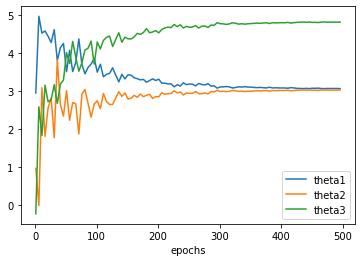

In [5]:
import matplotlib.pyplot as plt 

ax = plt.gca()

df.plot( kind='line',x='epochs',y='theta1',ax=ax)
df.plot( kind='line',x='epochs',y='theta2',ax=ax)
df.plot( kind='line',x='epochs',y='theta3',ax=ax)

plt.show()


b) Do the same as for a) but with learning rate $\eta = 0.01$ , 5000 epochs and for each 20th epoch. What do you notice when changing the learning rate? (*)


In [6]:
epoch_list = []
theta_1list = []
theta_2list = []
theta_3list = []


for epoch in range(1,5000,20):
    theta_1,theta_2,theta_3 = gradient_descent(X_train,y_train,learning_rate=.01,epochs=epoch).flatten()
    epoch_list.append(epoch)
    theta_1list.append(theta_1)
    theta_2list.append(theta_2)
    theta_3list.append(theta_3)

df = pd.DataFrame({"epochs":epoch_list,"theta1":theta_1list,"theta2":theta_2list,"theta3":theta_3list})

df.head()

,epochs,theta1,theta2,theta3
0,1,-0.956602,0.298955,1.299646
1,21,1.989342,0.633558,1.195736
2,41,3.978201,1.717258,1.189798
3,61,4.160094,1.018579,2.833528
4,81,4.621123,2.022713,1.827063


<AxesSubplot:xlabel='epochs'>

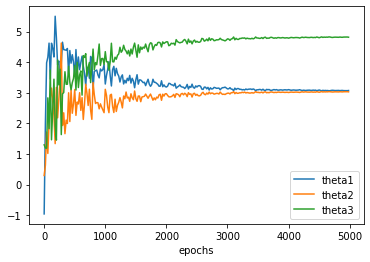

In [7]:
ax = plt.gca()

df.plot(x="epochs",y=["theta1","theta2","theta3"],ax=ax)


c) Experiment with larger and smaller $\eta$ and see what happens.

In [8]:
df_list = []
eta_values = [0.001,0.01,0.1,0.2,0.5,0.75]

for eta in eta_values:
    epoch_list = []
    theta_1list = []
    theta_2list = []
    theta_3list = []

    for epoch in range(1,5000,20):
        theta_1,theta_2,theta_3 = gradient_descent(X_train,y_train,learning_rate=eta,epochs=epoch).flatten()
        epoch_list.append(epoch)
        theta_1list.append(theta_1)
        theta_2list.append(theta_2)
        theta_3list.append(theta_3)

    df_list.append(pd.DataFrame({"epochs":epoch_list,"theta1":theta_1list,"theta2":theta_2list,"theta3":theta_3list}))
    print(f"eta = {eta} done")
    

eta = 0.001 done
eta = 0.01 done
eta = 0.1 done
eta = 0.2 done
eta = 0.5 done


/var/folders/q8/kg4v5mr16fv47tpsjyg28zlc0000gn/T/ipykernel_30867/2535529058.py:7: RuntimeWarning: overflow encountered in matmul
  gradient = 2/m* X.T @ (X @ theta - y)
/var/folders/q8/kg4v5mr16fv47tpsjyg28zlc0000gn/T/ipykernel_30867/2535529058.py:9: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate*gradient


eta = 0.75 done


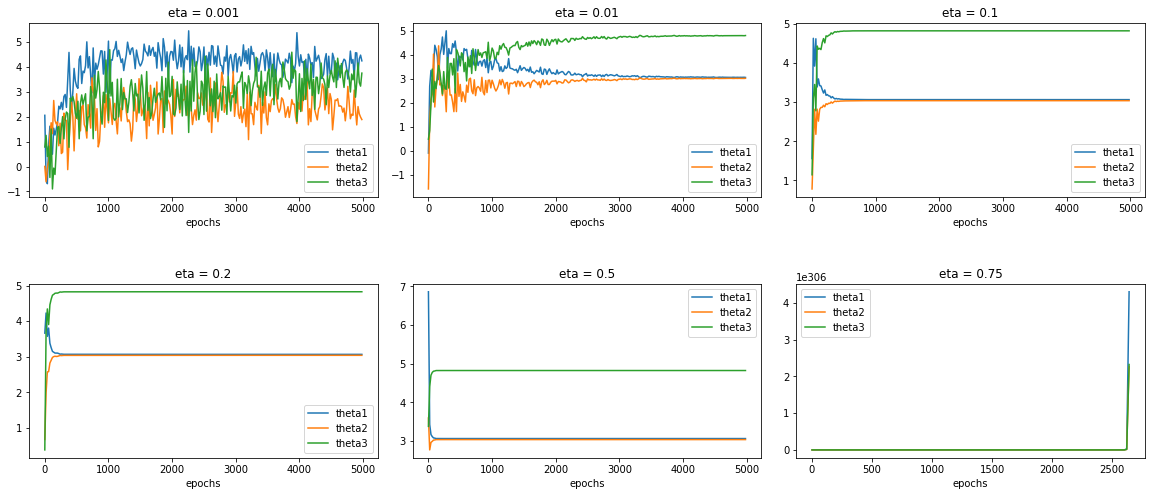

In [29]:
fig, axs = plt.subplots(2,3, figsize=(20, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.1)

axs = axs.ravel()

for i in range(6):
    eta = eta_values[i]
    df = df_list[i]
    axis = axs[i]

    df.plot(x="epochs",y=["theta1","theta2","theta3"],title=f"eta = {eta}",ax=axis )

# 2. Stochastic Gradient Descent - learning rate (**)

Repeat task 1 but using stochastic gradient descent instead. Also adjust number of epochs to see if you can find convergence. What kind of conclusions can you draw from your experiments. (**)

In [23]:
t0,t1 = 5,50

def learning_rate_schedule(t):
    """ Decrease learning rate as training progresses"""

    return t0/(t+t1)

epochs_list=[]
theta_1_list=[]
theta_2_list=[]
theta_3_list=[]

for epochs in range(1,1000,10):

    theta = np.random.randn(3,1)
    m = len(X_train)

    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            x_i = X_train[random_index:random_index+1]
            y_i = y_train[random_index:random_index+1]
            gradients = 2*x_i.T.dot(x_i.dot(theta)- y_i) 
            eta = learning_rate_schedule(epoch*m +i) 
            theta -= eta*gradients
    
    print(f"epochs {epochs} done")

    epochs_list.append(epochs)
    theta_1_list.append(theta[0].flatten())
    theta_2_list.append(theta[1].flatten())
    theta_3_list.append(theta[2].flatten())

df = pd.DataFrame({"epochs":epochs_list,"theta1":theta_1_list,"theta2":theta_2_list,"theta3":theta_3_list})

epochs 1 done
epochs 11 done
epochs 21 done
epochs 31 done
epochs 41 done
epochs 51 done
epochs 61 done
epochs 71 done
epochs 81 done
epochs 91 done
epochs 101 done
epochs 111 done
epochs 121 done
epochs 131 done
epochs 141 done
epochs 151 done
epochs 161 done
epochs 171 done
epochs 181 done
epochs 191 done
epochs 201 done
epochs 211 done
epochs 221 done
epochs 231 done
epochs 241 done
epochs 251 done
epochs 261 done
epochs 271 done
epochs 281 done
epochs 291 done
epochs 301 done
epochs 311 done
epochs 321 done
epochs 331 done
epochs 341 done
epochs 351 done
epochs 361 done
epochs 371 done
epochs 381 done
epochs 391 done
epochs 401 done
epochs 411 done
epochs 421 done
epochs 431 done
epochs 441 done
epochs 451 done
epochs 461 done
epochs 471 done
epochs 481 done
epochs 491 done
epochs 501 done
epochs 511 done
epochs 521 done
epochs 531 done
epochs 541 done
epochs 551 done
epochs 561 done
epochs 571 done
epochs 581 done
epochs 591 done
epochs 601 done
epochs 611 done
epochs 621 done
epo

In [26]:
for item in ["theta1","theta2","theta3"]:
    df[item]= [ df[item][i][0] for i in range(len(df[item]))]

<AxesSubplot:xlabel='epochs'>

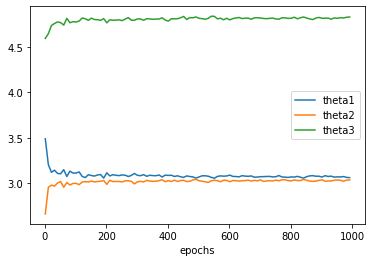

In [27]:
df.plot(x="epochs")